<small><i>This notebook was put together by [Abel Meneses-Abad](http://www.menesesabad.com) for Paper *Paraphrase Beyond Sentence*. Source and license info is on [GitHub](https://github.com/sorice/2017paraphrasebsent/).</i></small>

# 4.3 Handling Outliers

The outliers detection could help to improve the accuracy. The origin of the outliers is important. In MSRP corpus the possible outliers are real cases, so all of them are useful for future analysis or the design of new features.

Another benefict of outliers could be the analysis of anomalies in streamming data, that help the teams to discover new patterns or clusters, or anomalies behaviours. For costumer support this could help to identify potential customers who doesn't fit into classical patterns.

In [3]:
%pylab inline
import pickle
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


## Loading data

In [14]:
#Loading the splited MSRP corpus
data = open('data/cleaned-split-data.pkl','rb')
X_train, X_test, Y_train, Y_test = pickle.load(data)

### Loading MSRPC

In [4]:
#Read Paraphrase Corpus in TXT format
file_path = 'data/MSRPC-2004/msrpc.txt'

corpus = DataFrame(columns=['class','id1','id2','sent1', 'sent2'])
loading_except = []

with open(file_path) as corp:
    count = 0
    for row in corp:
        try:
            obj = row.split('\t')
            if count == 0: #do not process the line 0
                count+=1
                pass
            else: #do distance calculation in the rest
                corpus = corpus.append(Series(obj, index=corpus.columns), ignore_index=True)
                count+=1
        except:
            loading_except.append(count)

In [5]:
corpus.shape

(5801, 5)

### Loading the pre-trained Model

In [17]:
data = open('data/logreg_model.pkl','rb')
logreg = pickle.load(data)

In [18]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
metrics.accuracy_score(Y_test, y_pred)

0.761520737327189

In [19]:
#Predict X_test data to match later its correspondece with the outlier list
y_pred = logreg.predict(X_test)
f_index, = np.where(y_pred != Y_test)#selecting index where result is diff to spected
p_index, = np.where(y_pred == Y_test)
print('Number of errors:',len(f_index),'Value examples:',f_index[:5])
f_index

Number of errors: 414 Value examples: [ 3  7  9 16 19]


array([   3,    7,    9,   16,   19,   21,   23,   26,   29,   30,   31,
         35,   40,   41,   48,   53,   70,   72,   75,   77,   78,   80,
         81,   82,   87,   94,   96,  107,  109,  120,  126,  127,  130,
        132,  136,  138,  140,  141,  145,  146,  156,  160,  164,  170,
        171,  172,  174,  190,  192,  199,  206,  213,  215,  216,  218,
        220,  222,  228,  229,  230,  231,  238,  243,  245,  248,  251,
        258,  271,  274,  284,  286,  289,  298,  310,  312,  313,  317,
        325,  327,  332,  337,  338,  340,  342,  345,  354,  355,  364,
        366,  369,  373,  376,  384,  387,  388,  389,  390,  407,  415,
        416,  420,  422,  430,  434,  443,  449,  450,  451,  455,  459,
        471,  475,  476,  479,  481,  482,  486,  490,  493,  502,  503,
        506,  511,  514,  518,  522,  526,  531,  532,  534,  544,  546,
        550,  557,  558,  562,  565,  567,  568,  570,  571,  572,  588,
        592,  593,  597,  601,  605,  606,  608,  6

In [13]:
print('Accuracy:',len(p_index)/(len(f_index)+len(p_index)))

Accuracy: 0.761520737327189


In [14]:
type(f_index)

numpy.ndarray

# 4.3.2 Matching Errors vs Outliers Phase

In [6]:
corpus.head()

,class,id1,id2,sent1,sent2
0,1,1089874,1089925,"PCCW's chief operating officer, Mike Butcher, ...",Current Chief Operating Officer Mike Butcher a...
1,1,3019446,3019327,The world's two largest automakers said their ...,Domestic sales at both GM and No. 2 Ford Motor...
2,1,1945605,1945824,According to the federal Centers for Disease C...,The Centers for Disease Control and Prevention...
3,0,1430402,1430329,A tropical storm rapidly developed in the Gulf...,A tropical storm rapidly developed in the Gulf...
4,0,3354381,3354396,The company didn't detail the costs of the rep...,But company officials expect the costs of the ...


In [7]:
corpus.xs(0) #Showing de ID == 0, or sample 0.

class                                                    1
id1                                                1089874
id2                                                1089925
sent1    PCCW's chief operating officer, Mike Butcher, ...
sent2    Current Chief Operating Officer Mike Butcher a...
Name: 0, dtype: object

Msrpc(5801, 5) and Xtest(1736, 43) shapes are different then both structures are imposible to compare. The analysis until this point reflect that matching original text pairs against bad classified instances is impossible.  The solution: you need an 'id' column in both data structures with the original ID.

What realy matters here is the total number of rows. As you can see in 03.3-Similarity-Vector-Corpus-Construction notebook when textsim package try to calculate all distances (*calc_all func*) some pairs of texts are losted (1725 > 1671, diff = 54), due to the text composition it is imposible to get it in all cases, this missing cases are not appended to MSRP corpus in arff or csv format. How to deal with that?

## Adding new ID field

The code of 03.3 Constructing a Corpus of Similarity Objects after this point was changed to set the *'id'* column (or the feature 42) inside the ARFF and CSV corpus of MSRP.

The next question will be:

    How to get a list of searched index inside DataFrame structure?
    
See the code below!

In [13]:
s_index = []
for i in range(len(corpus)):
    if corpus.xs(i)['id1']=='1089874': #Get corpus rows where column 'id1' == '1089874'
        s_index.append(i)
corpus.take(s_index)

,class,id1,id2,sent1,sent2
0,1,1089874,1089925,"PCCW's chief operating officer, Mike Butcher, ...",Current Chief Operating Officer Mike Butcher a...


Correct! Now is the turn of numpy array (X_test, Xs, ...) and see the initial 10 example values in *X_test* numpy array column 41 (the feature 42 or id).

In [15]:
X_test[:10,41]

array([ 0.72244121, -2.24369728,  0.24306529,  1.05431684,  0.11123691,
       -1.56957489,  0.40785076,  1.07415723, -0.08650565,  1.69317744])

As you can see the integer ID numbers are missing, now id numbers are float because of scalling, and its imposible to let a column without scalling for machine learning classifier training (even more if this one is like the id column, a growing consecutive number list), because it can change the model. Then the solution is to use the original target (y) to get wrong values. Remember that train and test sets are obtained after scalling, neither they contain the ids.

In [20]:
p_index, = np.where(y_pred == Y_test) #Extracting well classified instances index.
#Extract index of values different to expected (bad classified instances).
f_index, = np.where(y_pred != Y_test) 
print('Number of errors:',len(f_index),'. Bad classified instance index examples:',f_index[:5])

Number of errors: 414 . Bad classified instance index examples: [ 3  7  9 16 19]


## How to get corpus lines where line_ID ==  outliers_ID

In [22]:
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope

pca = PCA(n_components=2)
Zscore_components = pca.fit_transform(X_test)
robust_covariance_est = EllipticEnvelope(store_precision=False,
                                            assume_centered = False, contamination=.05)
robust_covariance_est.fit(Zscore_components)
detection = robust_covariance_est.predict(Zscore_components)
outliers, = np.where(detection==-1)
regular, = np.where(detection==1)

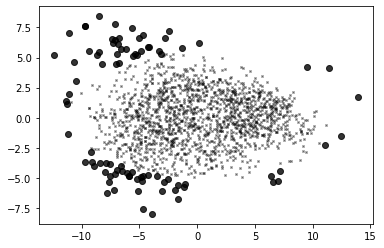

In [23]:
a = plt.plot(Zscore_components[regular,0],Zscore_components[regular,1],
'x', markersize=2, color='black', alpha=0.6, label='inliers')
b = plt.plot(Zscore_components[outliers,0],Zscore_components[outliers,1],
'o', markersize=6,color='black', alpha=0.8, label='outliers')
plt.show()

In [24]:
print(len(outliers),len(regular))
outliers

87 1649


array([  11,   87,  109,  125,  127,  152,  165,  170,  179,  187,  219,
        226,  227,  240,  259,  278,  280,  281,  294,  310,  311,  382,
        388,  392,  418,  434,  438,  458,  491,  504,  522,  536,  556,
        557,  559,  577,  626,  634,  792,  806,  816,  820,  829,  876,
        880,  882,  898,  907,  938,  939,  973, 1018, 1027, 1054, 1058,
       1064, 1138, 1149, 1159, 1190, 1226, 1265, 1271, 1278, 1296, 1298,
       1310, 1313, 1315, 1330, 1359, 1392, 1395, 1433, 1450, 1478, 1487,
       1494, 1496, 1502, 1576, 1595, 1603, 1607, 1646, 1662, 1733])

In [27]:
s_index = []
real_miss_classified = []
for i in range(len(f_index)):
    if f_index[i] in outliers: #Get corpus bad classified instances (rows) that are present in outliers.
        real_miss_classified.append(f_index[i])
        s_index.append(f_index[i])
print(real_miss_classified)
corpus.iloc[s_index] #OR corpus.take(s_index)


[87, 109, 127, 170, 310, 388, 434, 522, 557, 876, 880, 939, 1018, 1058, 1149, 1159, 1190, 1271, 1278, 1359, 1395, 1433, 1502, 1646]


,class,id1,id2,sent1,sent2
87,1,459228,458802,"""I'm real excited to be a Cleveland Cavalier,""...","""I'm really excited about going to Cleveland,""..."
109,1,1945483,1945409,This issue is unlikely to be resolved until la...,The issue is unlikely to be resolved until Con...
127,1,2375777,2375808,A neighbor said a duffel bag containing a woma...,A neighbor said a woman's body was dug up in a...
170,1,1630597,1630669,Stewart said the ring was most likely a work i...,Mr. Stewart said the ring was most likely a wo...
310,1,3102010,3102052,"""Turning the corner does not mean we've crosse...","""But turning the corner doesn't mean crossing ..."
388,1,618359,617945,Buoyed by some of the advice imparted by Nickl...,"Buoyed by advice imparted by Nicklaus, Howell ..."
434,1,2473394,2473357,Aiken's study appears in the Sept. 24 issue of...,The findings appear in Wednesday's Journal of ...
522,1,1661881,1662136,"Police Chief Superintendent Jesus Verzosa, who...","Police chief Superintendent Jesus Verzosa, who..."
557,1,347483,347458,"Enstrom and Kabat focused their work on 35,561...","The study focused on the 35,561 people who had..."
876,0,130088,130000,It closed Tuesday at its highest level since l...,"On Tuesday, the S&P 500 rose to its highest si..."


In [30]:
df2 = corpus.iloc[s_index]
df2.shape

(24, 5)

In [38]:
data = open('data/clean-scaled-positive-data.pkl', 'rb')
X,Y, columns, index = pickle.load(data)

In [39]:
df = pd.DataFrame(X, columns=columns, index=index)

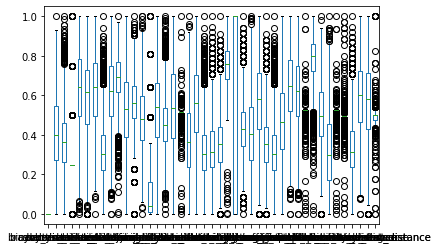

In [40]:
df.plot.box()

## Conclusions

Only 24 out of 414 missclasified classify as outlier, which is cosiderable credible because linear models are less sensitive to outliers.

The deep analysis show the missclasified cases do not depend of outliers. That means a new feature engineering is needed. A new set of features that really describe the problem of paraphrasis in this dataset in particular.

## Recomendation

* The elimination of outliers or their substitution by the mean() is not treated here. The relevance of their elimination depends on the classifier selected, some models are not sensitive to outliers.
    - Also in annotated datasets like MSRP Corpus those cases are real cases, it is not recommended to eliminate them, but use them as starting points in a new feature design.
* Besides neither elimination nor substitution are easy ways to remove outliers from a multivariate dataset.
* Repeat this experiment with other classifiers.